<a href="https://colab.research.google.com/github/CJYjob/ds-section2-Project/blob/main/Section2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 시장 지표 불러오기
## 데이터를 불러와 파일로 저장 - 매번, 데이터를 불러오기엔 시간 소모가 큼.
+ 코스피 지수 (kospi) : 날짜 / 종가 / 시가 / 고가 / 저가 / 거래량 / 변화율
+ 코스닥 지수 (kosdaq) : 날짜 /종가 / 시가 / 고가 / 저가 / 거래량 / 변화율
+ 다우 지수 (dow) : 날짜 /종가 / 시가 / 고가 / 저가 / 거래량 / 변화율
+ 나스닥 지수 (nasdaq) : 날짜 /종가 / 시가 / 고가 / 저가 / 거래량 / 변화율
+ sp500 지수 (sp500) : 날짜 /종가 / 시가 / 고가 / 저가 / 거래량 / 변화율
+ 달러 원 환율 (UK) : 날짜 /종가 / 시가 / 고가 / 저가 / 거래량 / 변화율
+ 유로 원 환율 (EK) : 날짜 /종가 / 시가 / 고가 / 저가 / 거래량 / 변화율
+ 엔 원 환율 (JK) : 날짜 /종가 / 시가 / 고가 / 저가 / 거래량 / 변화율
+ 위안 원 환율 (CK) : 날짜 /종가 / 시가 / 고가 / 저가 / 거래량 / 변화율
   
## 사용하지 않는 거래량, 변화율 칼럼을 제외하고 불러와서 사용.

In [ ]:
# # 드라이브 연결시 사용
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# # 런타임 재 연결시, 관련 설치
# !pip install finance-datareader
# !pip install pandas-datareader
# !pip install category_encoders

In [ ]:
# 데이터 핸들링
import pandas as pd
import FinanceDataReader as fdr
import pandas_datareader as pdr
import numpy as np
import collections # numpy.float 올림, 내림 목적

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 사이킷런 - 데이터 셋 나누기
from sklearn.model_selection import train_test_split

# 사이킷런 - encoders & imputers
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer 

# 사이킷런 - 파이프라인
from sklearn.pipeline import make_pipeline

# 사이킷런 - 학습모델
from xgboost import XGBClassifier

# 사이킷런 - 모델 평가 지표
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# pd 출력 옵션 조정
pd.set_option('max_rows', None)
pd.set_option('max_columns', None)

In [ ]:
# 시장 목록, 시장-심볼 딕셔너리 정의
vars = ['kospi', 'kosdaq', 'dow', 'nasdaq', 'sp500', 'UK', 'EK', 'JK', 'CK']
symbols = {'kospi' : 'KS11', 
           'kosdaq' : 'KQ11', 
           'dow' : 'DJI', 
           'nasdaq' : 'IXIC', 
           'sp500' : 'US500', 
           'UK' : 'USD/KRW',
           'EK' : 'EUR/KRW',
           'JK' : 'JPY/KRW',
           'CK' : 'CNY/KRW'
           }

In [ ]:
# # 데이터 파일로 저장 : 아직 데이터를 받지 않았을 때 사용 
# # quandl api를 통한 현물 가격 지표 가져와야할 가능성 있음.
# for i in symbols : 
#   fdr.DataReader(symbols[i], '2000')[:'2022-8-31'].to_csv(f'/content/drive/MyDrive/Colab Notebooks/Codestates/Section 2/Section 2 Project/Data/{i}.csv')

In [ ]:
# 저장된 파일 불러오기
#   사용하는 칼럼은 Date, Close, Open, High, Low
kospi = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/Codestates/Section 2/Section 2 Project/Data/kospi.csv', usecols=['Date', 'Close', 'Open', 'High', 'Low'], index_col=0)
kosdaq = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/Codestates/Section 2/Section 2 Project/Data/kosdaq.csv', usecols=['Date', 'Close', 'Open', 'High', 'Low'], index_col=0)
dow = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/Codestates/Section 2/Section 2 Project/Data/dow.csv', usecols=['Date', 'Close', 'Open', 'High', 'Low'], index_col=0)
nasdaq = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/Codestates/Section 2/Section 2 Project/Data/nasdaq.csv', usecols=['Date', 'Close', 'Open', 'High', 'Low'], index_col=0)
sp500 = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/Codestates/Section 2/Section 2 Project/Data/sp500.csv', usecols=['Date', 'Close', 'Open', 'High', 'Low'], index_col=0)
UK = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/Codestates/Section 2/Section 2 Project/Data/UK.csv', usecols=['Date', 'Close', 'Open', 'High', 'Low'], index_col=0)
EK = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/Codestates/Section 2/Section 2 Project/Data/EK.csv', usecols=['Date', 'Close', 'Open', 'High', 'Low'], index_col=0)
JK = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/Codestates/Section 2/Section 2 Project/Data/JK.csv', usecols=['Date', 'Close', 'Open', 'High', 'Low'], index_col=0)
CK = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/Codestates/Section 2/Section 2 Project/Data/CK.csv', usecols=['Date', 'Close', 'Open', 'High', 'Low'], index_col=0)
dfs = [kospi, kosdaq, dow, nasdaq, sp500, UK, EK, JK, CK]

# 개별 종목 데이터 불러오기

In [ ]:
# # 코스피 종목 코드
# kospiCode = fdr.StockListing('KOSPI')

In [ ]:
# # 코스닥 종목 코드
# kosdaqCode = fdr.StockListing('KOSDAQ')

In [ ]:
# # 삼성전자 주가 데이터
# SamSungCode = kospiCode[kospiCode['Name'] == '삼성전자']['Symbol'].iloc[0]
# SamSungStock = fdr.DataReader(SamSungCode)
# SamSungStock.head(5), SamSungStock.tail(5)

# 데이터 전처리
+ 이번 분석은 kospi/kosdaq에 대한 예측이 목적입니다. 그러므로, kospi와 kosdaq의 날짜를 기준으로, 다른 데이터들을 사용해야 하며, 이에 따른 널값이 생길 수 있습니다. ( kospi/kosdaq은 정보가 있으나, 다른 데이터에 정보가 없는 경우 null값이나 다른 수로 채워줍니다. 다른 데이터 정보는 있으나, kospi/kosdaq 정보가 없는 경우는 labeling이 불가능 하므로, 사용하지 않습니다.)

In [ ]:
# 데이터 프레임들의 shape을 확인하기 위한 함수 정의
def dfs_shape() :
  for i in range(len(dfs)) :
    print(f'{vars[i]} shape : {dfs[i].shape}')

In [ ]:
# kospi와 다른 시장 지표들의 데이터 수집 일자가 같은지 확인하는 함수 정의
def dfs_spec_date() :
  for i in range(len(vars)) :
    print(f"{vars[i]}'s Date == kospi's Date : ", set(kospi.index)==set(dfs[i].index))

In [ ]:
dfs_shape()

kospi shape : (5597, 4)
kosdaq shape : (5357, 4)
dow shape : (5703, 4)
nasdaq shape : (5703, 4)
sp500 shape : (5703, 4)
UK shape : (5909, 4)
EK shape : (5910, 4)
JK shape : (5908, 4)
CK shape : (5908, 4)


In [ ]:
dfs_spec_date()

kospi's Date == kospi's Date :  True
kosdaq's Date == kospi's Date :  False
dow's Date == kospi's Date :  False
nasdaq's Date == kospi's Date :  False
sp500's Date == kospi's Date :  False
UK's Date == kospi's Date :  False
EK's Date == kospi's Date :  False
JK's Date == kospi's Date :  False
CK's Date == kospi's Date :  False


In [ ]:
date = pd.merge(dfs[0], dfs[1], how='inner', on='Date').index

In [ ]:
# kospi, kosdaq 정보가 다 있는 날짜 외의 데이터를 제거
for df in dfs :
  for i in df.index :
    if not(i in set(date)) :
      df.drop(i, axis=0, inplace=True)

In [ ]:
dfs_shape()

kospi shape : (5356, 4)
kosdaq shape : (5356, 4)
dow shape : (5189, 4)
nasdaq shape : (5189, 4)
sp500 shape : (5189, 4)
UK shape : (5356, 4)
EK shape : (5356, 4)
JK shape : (5356, 4)
CK shape : (5356, 4)


In [ ]:
dfs_spec_date()

kospi's Date == kospi's Date :  True
kosdaq's Date == kospi's Date :  True
dow's Date == kospi's Date :  False
nasdaq's Date == kospi's Date :  False
sp500's Date == kospi's Date :  False
UK's Date == kospi's Date :  True
EK's Date == kospi's Date :  True
JK's Date == kospi's Date :  True
CK's Date == kospi's Date :  True


In [ ]:
# kospi, kosdaq 의 정보가 있는 날짜의 데이터가 없는 지표는 NaN으로 채워줌
for df in dfs[2:5] :
  for date in kospi.index :
    if not(date in df.index) :
      df.loc[date] = [np.NaN,  np.NaN, np.NaN, np.NaN]
  df.sort_index(axis=0, inplace=True)

In [ ]:
dfs_spec_date()

kospi's Date == kospi's Date :  True
kosdaq's Date == kospi's Date :  True
dow's Date == kospi's Date :  True
nasdaq's Date == kospi's Date :  True
sp500's Date == kospi's Date :  True
UK's Date == kospi's Date :  True
EK's Date == kospi's Date :  True
JK's Date == kospi's Date :  True
CK's Date == kospi's Date :  True


In [ ]:
# 새로 추가한 Null 행은 총 36개 입니다.
for df in dfs[2:5] :
  print(df.isnull().sum())

Close    167
Open     167
High     167
Low      167
dtype: int64
Close    167
Open     167
High     167
Low      167
dtype: int64
Close    167
Open     167
High     167
Low      167
dtype: int64


In [ ]:
# Null 행의 값을 이전 행의 값으로 채웁니다.
# (시계열 데이터이기 때문에, 바로 앞의 데이터로 대체하는 것이 적합)
for df in dfs[2:5] :
  df.fillna(method='ffill', inplace=True)

In [ ]:
# null값이 연속으로 존재하는 행이 없어, 바로 Null행의 처리가 끝남.
for df in dfs[2:5] :
  print(df.isnull().sum())

Close    0
Open     0
High     0
Low      0
dtype: int64
Close    0
Open     0
High     0
Low      0
dtype: int64
Close    0
Open     0
High     0
Low      0
dtype: int64


## 시계열 데이터
+ 이번에 활용할 분석 방법들은, 시계열성이 없는 데이터를 분석하는 방법들로 주어진 데이터에 적용이 어렵습니다.
+ 따라서 시간의 흐름에서 나타나는 반복성을 통해 범주형 데이터로 변환해 줌으로써 데이터의 시간축을 제거하고자 합니다.(반복성)
+ 또는 동일 시점에서의 데이터를 활용함으로써 시간축을 제거할 수 있습니다.(시점)
+ 마지막으로, 일정 기간의 데이터를 묶어 하나의 기준으로 계산해줌으로서, 특정 시점의 비교 기준으로 만들어 줍니다.(반복성, 시점)
  + slide window : 시간을 연결 데이터 값으로 대체(기준 마련.)

### 반복성, 범주형 - 달에 따른 구분 (Month)
+ 매년 3월은 투자자들이 조심스러워 지는 달입니다. 회사들의 재무제표가 공개되고, 재평가가 이루어지면서, 그동안 발생했던 오차들이 수정되는 기간이기 때문입니다. 자신의 판단이 어떤 방향으로 어느정도의 오차를 갖느냐에 따라, 수익과 손실이 결정되고, 그 금액도 편차를 달리하게 됩니다.
+ 계절에 따라 사람들의 행동양식이 바뀌면, 시장의 수익구조도 변화합니다. 동시에 이에 따른 투자 양샹도 달라질 것이라 추측할 수 있습니다. 달의 구분은 계절의 변화를 어느정도 반영할 것입니다.
+ 투자자들이 예측을 어려워 하는 '네 마녀의 날'이 있습니다. 매 분기마다, 4가지 파생상품의 만기일이 겹치면서, 주가의 변동성이 커지는 날입니다. 즉, 분기마다 투자자의 행동이 반복됩니다.
+ 이처럼, 달을 기준으로 투자자들의 반복되는 행동을 반영하기 위해 Month 칼럼을 두어 명목형 데이터로 취급합니다.



In [ ]:
# kospi 와 kosdaq 에 month 칼럼을 추가하는 함수 정의
def add_month(df) :
  df['Month'] = df.index.str[5:7]

In [ ]:
# kospi와 kosdaq에 month 칼럼 추가
for i in range(len(df[:2])) :
  add_month(dfs[i])

### 반복성, 범주형 - 주가의 흐름에 따른 구분

#### 추세
+ 주가는 일반적으로 개별 주체의 행동 결과로 파동의 형태를 띄며, 추세를 따라 움직입니다.
+ 일반적으로 상승 추세선은 저점을 연결해, 하락 추세선은 고점들을 연결해 결정합니다. 이때, 두 추세선의 기울기 부호 조합에 따라, 추세를 세분화 할 수 있습니다.
+ 상승 추세 : 수렴, 발산, 평행 / 횡보 추세 : 수렴, 발산, 평행 / 하락 추세 : 수렴, 발산, 평행


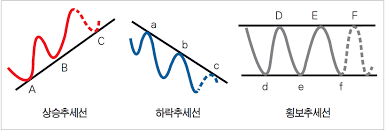



In [ ]:
# 추세선은 시간과 주가를 축으로 그려집니다.
# 시간축은 연산이 힘들기 때문에 단순한 수치형 데이터로 변환합니다.
# 하루라는 일정한 단위로 나뉘므로, 단순한 정수 인덱스로 재배열 해도 무리가 없습니다.
# (단, 기울기 계산이 필요함으로 1부터 인덱싱합니다.)

In [ ]:
# # 시간 인덱스 제거
# kospi_line = kospi.reset_index(drop=True)
# kospi_line.index = kospi_line.index+1

In [ ]:
# # 추세선을 긋기 위한 두 점 설정.

# # 시점
# start = kospi_line['Close'][1]
# startX = 1

# # 경유점
# middle = kospi_line['Close'][2]
# middleX = 2
# middleSlope = (middle - start) / (middleX - startX)

# # 종점
# end = kospi_line['Close'][2]
# endX = 2
# endSlope = (end - start) / (endX - startX)

In [ ]:
# # 추세 긋기
# for i in range(2, len(kospi_line)+1) :
#   if ((kospi_line['Close'][i] - start)) / (i - startX) > 0 :
#     if ((end - startX) / (endX - startX) * 0.95) < ((kospi_line['Close'][i] - start) / (i - startX)) < ((end - startX) / (endX - startX)) :
#       end = kospi_line['Close'][i]
#       endX = i
#   else :
#     pass

In [ ]:
# # 시각화 
# plt.plot(kospi_line['Close'])
# plt.plot([startX, start], [end, endX] ,color="green")
# plt.scatter([startX, start], [endX, end])

#### 지지와 저항
+ 동일한 사건에 대한 사람의 행동은 어느정도 일반화가 가능합니다. 예를 들어, 화재가 난다면, 화재 장소에 있던 사람은 다른 변수가 있지 않은 이상 화재 장소에서 도망갈 것이라고 예측할 수 있습니다. 이는 화재에 대한 일반적인 인간의 반응이 정해져 있기 때문입니다.
+ 이러한 경향은 주식시장에서도 관찰됩니다. 즉, 주가가 특정 기준선을 두고 움직임을 알 수 있습니다.
  + 주가가 상승하거나 하락할 때, 사람들은 이전 주가의 최고점, 최저점, 주가가 오랫동안 머물럿던 지점을 기준으로 삼아 행동합니다. 때문에 주가가 계단식 흐름을 보이는 경우가 많습니다. 이때, 최고점, 최저점의 주가를 나타내는 선을 지지선 혹은 저항선이라 부릅니다.
+ 지지와 저항의 각 스텝별로, 주가의 크기가 다르기 때문에, 순서형 범주데이터로 분류할 수 있습니다.


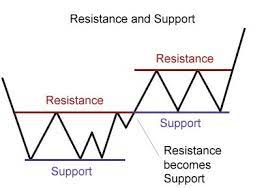


In [ ]:
# # 일 주가의 모든 정수 범위 모음
# # 범위에 존재하는 모든 정수를 갖도록 올림, 반올림
# for i in range(len(kospi)) :
#   if kospi['Open'].iloc[i] <= kospi['Close'].iloc[i] :
#     top = np.floor(kospi['Close'][i])
#     bottom = np.ceil(kospi['Open'][i])
#   else :
#     top = np.ceil(kospi['Open'][i])
#     bottom = np.floor(kospi['Close'][i])

In [ ]:
# # 해당 범위에서 갖는 정수들을 셈.
# # 추후 합쳐서, 주가가 지나간 횟수를 count하려고 함
# x = collections.Counter(list(range(int(np.floor(kospi['Open'].iloc[0])), int(np.ceil(kospi['Close'].iloc[0])))))
# y = collections.Counter(list(range(int(np.floor(kospi['Open'].iloc[20])), int(np.ceil(kospi['Close'].iloc[20])))))

#### 다우 이론
주가 흐름 분석의 기준이 되는 이론으로, 주가의 움직임을 예측합니다. 구간 별로 주가의 움직임에 따라 사람들이 갖는 심리가 다르기 때문에 일정한 움직임을 보이게 됩니다.

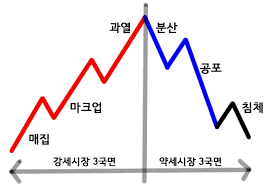

### 시점 비교


#### 지수

+ 세계 경제는 여러 변수를 바탕으로 연결되어 있습니다.
+ 지수는 각 시장의 변수를 반영해 결정됩니다.
+ 즉, 전세계 시장의 공통적인 변수들이 각 지수에 반영되기 때문에, 지수간에는 상관관계가 있을 수 있습니다. 때문에, 지수를 예측하기 위해 다른 지수들을 고려합니다.

#### 환율

+ 환율에 따라, 화폐로 표현한 가치는 다르게 평가됩니다. 시장의 가치역시 마찬가지 입니다.
+ 때문에 시장 가치를 나타내는 지수는 환율의 영향을 받습니다.

#### 현물
+ 금이나 석유 등 현물 가격도 결국 시장에 영향을 미치므로, 그 영향력을 고려 할 수 있습니다.

### 수치형 - 비교 기준 마련
+ 시계열 데이터라도, 각 시점에서의 기준점을 계산해주면, 시간축을 무시할 수 있습니다.

#### 전일 주가
+ 전일의 주가 자체만으로는 큰 의미를 갖지 못합니다. 다음의 요소들과 동시에 고려하여, 주가가 어느 위치에서, 어느 방향으로, 얼마나 움직였는지는 오늘 주가의 방향 혹은 얼마나 이동할지를 예측하는데 도움을 줄 수 있습니다.
+ 예를 들어, 추세선과 비교하여, 추세선 위에서 시작된 주가가, 추세선을 뚫고 내려가, 종가가 최저가가 되었다면, 시장 참여자의 심리와 장 마지막까지 유지된 하락의 모멘텀을 고려했을 때, 주가가 하락할 것이라고 예측할 수 있습니다.

#### 추세선
시계열 데이터를 바탕으로 추세선을 계산해 주가의 비교 기준으로 삼습니다.

#### 지지,저항선
시계열 데이터를 바탕으로 지지선, 저항선을 계산해 주가의 비교 기준으로 삼습니다.

#### 평균선(5, 20, 60, 120, 240)
시계열 데이터를 바탕으로 5일(1주일), 20일(1개월), 60일(3개월), 120일(6개월), 240일(1년) 주가 평균을 계산해 주가의 비교 기준으로 삼습니다.

#### 평균으로부터의 분산
주가는 정책으로 인해, 단기간에 이전 주가들에서 크게 벗어나지 못합니다. 즉, 분산의 극단에 해당하는 주가는 점진적으로 분산의 중심에 해당하는 주가로 변화한다는 의미입니다. 따라서, 주가의 이동방향을 결정할 수 있습니다.

## 종목별 데이터
+ 위의 분석 법들은 각 종목의 분석에도 사용될 수 있습니다.

## sliding window 기법
+ 시계열 데이터를 처리하기 위해, 시간 인덱스를 이전 레코드의 value 값으로 대체한다.

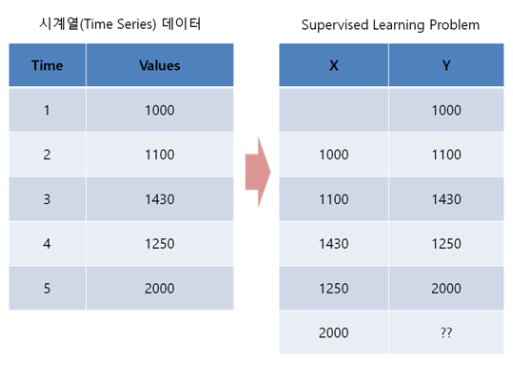

In [ ]:
kospi.head(5) ## 궁금한 점. slidingWindow 함수전의 칼럼은 5개

,Close,Open,High,Low,Month
Date,,,,,
2001-01-02,520.95,503.31,521.34,500.97,01
2001-01-03,521.43,512.74,524.58,510.70,01
2001-01-04,558.02,551.53,567.16,550.91,01
2001-01-05,580.85,559.54,581.41,555.40,01
2001-01-08,586.65,573.72,587.91,572.48,01


In [ ]:
# slide window 함수 정의
#   전날의 종가, 지수, 환율 정보를 칼럼으로 추가 후
#   레코드를 한줄씩 밀어내줌(때문에, 첫번째 레코드는 NaN값을 포함하므로 제거)
#   레코드의 Close, Open, High, Low는 Label이 가능하며,
#   추가된 칼럼들로 이를 예측 
def slidingWindow(df) :
  df['iDow'] = dfs[2]['Close']
  df['iNasdaq'] = dfs[3]['Close']
  df['iSP500'] = dfs[4]['Close']
  df['iUK'] = dfs[5]['Close']
  df['iEK'] = dfs[6]['Close']
  df['iJK'] = dfs[7]['Close']
  df['iCK'] = dfs[8]['Close']

  df['iClose'] = df['Close'].shift(1)
  df['iDow'] = df['iDow'].shift(1)
  df['iNasdaq'] = df['iNasdaq'].shift(1)
  df['iSP500'] = df['iSP500'].shift(1)
  df['iUK'] = df['iUK'].shift(1)
  df['iEK'] = df['iEK'].shift(1)
  df['iJK'] = df['iJK'].shift(1)
  df['iCK'] = df['iCK'].shift(1)

  df = df[1:]
  return df

In [ ]:
# kospi, kosdaq 에 slide window 적용
for i in range(len(dfs[:2])) :
  dfs[i] = slidingWindow(dfs[i])

In [ ]:
kospi.head(5) # slidingWindow 함수 후에 칼럼 변화는 적용이 되는데, 왜 슬라이싱한건 결과에 반영이 안되지???

,Close,Open,High,Low,Month,iDow,iNasdaq,iSP500,iUK,iEK,iJK,iCK,iClose
Date,,,,,,,,,,,,,
2001-01-02,520.95,503.31,521.34,500.97,01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-03,521.43,512.74,524.58,510.70,01,10646.15,2291.86,1283.3,1278.0,1213.78,11.1616,154.39,520.95
2001-01-04,558.02,551.53,567.16,550.91,01,10945.75,2616.69,1347.6,1270.5,1179.15,11.1791,153.49,521.43
2001-01-05,580.85,559.54,581.41,555.40,01,10912.41,2566.83,1333.3,1263.3,1199.57,10.9159,152.61,558.02
2001-01-08,586.65,573.72,587.91,572.48,01,10662.01,2407.65,1298.3,1262.5,1209.47,10.8286,152.52,580.85


# 분류를 위한 라벨 추가

당일 : Close - Open 값의 부호로, 라벨을 나눠줌.

In [ ]:
def CreateClassLabel(df) :
  df['Class'] = df['Close'] - df['Open']
  for i in range(len(df)) :
    if df['Class'].iloc[i] > 0 :
      df['Class'].iloc[i] = 1 # 당일 양봉을 의미
    else :
      df['Class'].iloc[i] = 0 # 당일 음봉, 보합을 의미(둘다 매매시 손해임으로 같이 분류)
  return df

In [ ]:
for i in range(len(dfs[:2])) :
  dfs[i] = CreateClassLabel(dfs[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


# 머신러닝 적용

In [ ]:
# feature set, target vector 설정
target = 'Class'
features = ['Month',	'iDow',	'iNasdaq',	'iSP500', 'iUK',	'iEK',	'iJK',	'iCK',	'iClose']

# train을 features & target으로 나눈다.
y_train_p = dfs[0][target]
X_train_p = dfs[0][features]
y_train_d = dfs[1][target]
X_train_d = dfs[1][features]

In [ ]:
# features - object 컬럼(Month)의 cardinality 확인
X_train_p.describe(exclude='number').T.sort_values(ascending=False, by='unique')

,count,unique,top,freq
Month,5355,12,07,481


In [ ]:
# 모델 성능 유추를 위한 검증 데이터셋 나누기
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_train_p, y_train_p, test_size=0.2, random_state = 0)
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_train_d, y_train_d, test_size=0.2, random_state = 0)

X_train_p, X_val_p, y_train_p, y_val_p = train_test_split(X_train_p, y_train_p, test_size=0.2, random_state = 0)
X_train_d, X_val_d, y_train_d, y_val_d = train_test_split(X_train_d, y_train_d, test_size=0.2, random_state = 0)

In [ ]:
# 데이터셋 크기 확인 (train의 features, train의 target의 row 수가 일치해야 한다.)
X_train_p.shape, y_train_p.shape, X_val_p.shape, y_val_p.shape, X_test_p.shape, y_test_p.shape, X_train_d.shape, y_train_d.shape, X_val_d.shape, y_val_d.shape, X_test_d.shape, y_test_d.shape 

((3427, 9),
 (3427,),
 (857, 9),
 (857,),
 (1071, 9),
 (1071,),
 (3427, 9),
 (3427,),
 (857, 9),
 (857,),
 (1071, 9),
 (1071,))

In [ ]:
encoder = OrdinalEncoder()
X_train_p_encoded = encoder.fit_transform(X_train_p)  
X_val_p_encoded = encoder.transform(X_val_p)  

model = XGBClassifier(
    n_estimators=1000,  
    random_state=2,
    n_jobs=-1,
    max_depth=7,
    learning_rate=0.2
)

watchlist = [(X_train_p_encoded, y_train_p), (X_val_p_encoded, y_val_p)]

model.fit(
    X_train_p_encoded,
    y_train_p,
    eval_set=watchlist,
    early_stopping_rounds=200 # Best iteration : 40 
)

[0]	validation_0-error:0.416107	validation_1-error:0.516919
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 200 rounds.
[1]	validation_0-error:0.375547	validation_1-error:0.507585
[2]	validation_0-error:0.360957	validation_1-error:0.506418
[3]	validation_0-error:0.355413	validation_1-error:0.504084
[4]	validation_0-error:0.344033	validation_1-error:0.499417
[5]	validation_0-error:0.332361	validation_1-error:0.502917
[6]	validation_0-error:0.316895	validation_1-error:0.514586
[7]	validation_0-error:0.31281	validation_1-error:0.52042
[8]	validation_0-error:0.307849	validation_1-error:0.523921
[9]	validation_0-error:0.297053	validation_1-error:0.522754
[10]	validation_0-error:0.291217	validation_1-error:0.521587
[11]	validation_0-error:0.292092	validation_1-error:0.521587
[12]	validation_0-error:0.291509	validation_1-error:0.52042
[13]	validation_0-error:0.287423	validation_1-error:0.5227

XGBClassifier(learning_rate=0.2, max_depth=7, n_estimators=1000, n_jobs=-1,
              random_state=2)

In [ ]:
model.best_iteration

4

In [ ]:
y_pred_p = model.predict(X_val_p_encoded)
print("검증 f1", f1_score(y_val_p, y_pred_p))

검증 f1 0.5057736720554272
